In [30]:
import numpy as np
from sklearn import datasets
from sklearn import linear_model

# Predict disease progression from physiological variables

In [22]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [23]:
print len(diabetes.data[:-20])

422


In [25]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)
print 'regression coefficients: ', regr.coef_

regression coefficients:  [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


/Users/kcclaws/.virtualenvs/analytics/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [28]:
print -8.14131709e+02

-814.131709


In [35]:
# MSE
print 'MSE: ',np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

# explained variance score: 1 is a perfectr prediction
# and 0 means that there is no linear relationship
# between X and y
print 'explained variance score: ',regr.score(diabetes_X_test,diabetes_y_test)

MSE:  2004.5676026898218
explained variance score:  0.5850753022690572


# Shrinkage

In [44]:
X = np.c_[0.5,1].T
y = [0.5,1]
test = np.c_[0,2].T

In [45]:
print X,'\n\n',y, '\n\n', test

[[0.5]
 [1. ]] 

[0.5, 1] 

[[0]
 [2]]


In [46]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 640x480 with 0 Axes>

0 [[0.67640523]
 [1.04001572]]
1 [[0.5978738 ]
 [1.22408932]]
2 [[0.6867558 ]
 [0.90227221]]
3 [[0.59500884]
 [0.98486428]]
4 [[0.48967811]
 [1.04105985]]
5 [[0.51440436]
 [1.14542735]]


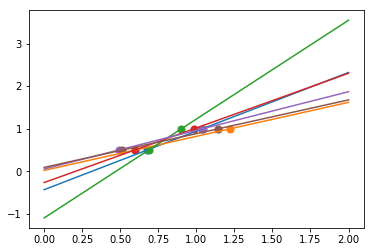

In [67]:
np.random.seed(0)
for _ in range(6):
    this_X = 0.1*np.random.normal(size=(2,1)) + X
    print _,this_X
    regr.fit(this_X,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_X,y,s=50)

In [69]:
#to deal with the noise caused by the few data points per dimension 
#use ridge regression
#Example of bias/variance trade-off: the larger the alpha parameter
#the higher the bias and the lower the variance

0 [[0.67640523]
 [1.04001572]]
1 [[0.5978738 ]
 [1.22408932]]
2 [[0.6867558 ]
 [0.90227221]]
3 [[0.59500884]
 [0.98486428]]
4 [[0.48967811]
 [1.04105985]]
5 [[0.51440436]
 [1.14542735]]


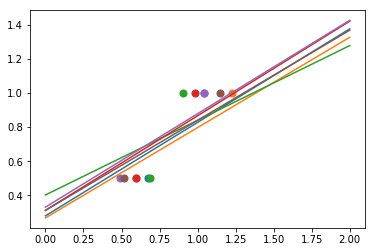

In [71]:
rregr = linear_model.Ridge(alpha=.1)

plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X = 0.1*np.random.normal(size=(2,1)) + X
    print _,this_X
    rregr.fit(this_X,y)
    plt.plot(test,rregr.predict(test))
    plt.scatter(this_X,y,s=50)

In [73]:
#help(np.logspace)

In [75]:
alphas = np.logspace(-4,-1,6)
print alphas

[0.0001     0.00039811 0.00158489 0.00630957 0.02511886 0.1       ]


In [62]:
print test

[[0]
 [2]]


In [79]:
np.log(4)

1.3862943611198906

In [81]:
??np.logspace

In [82]:
999*0.05

49.95

In [84]:

1.0/50

0.02